# Using Deep Learning to solve Non-Linear Classification problems

This notebook will use the SciKit-Learn's *make_circles* function to create a 2 target value, concentric circle, dataset.  

While you can use Deep Learning techniques to solve lines problems, you **cannot** use Linear Regression techniques to solve non-linear problems.


In [34]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Create the dataset using the *make_circles* [function from Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).

Factor - scale factor between the inner circle and the outer circle. 

Noise - Standard deviation of Gaussian noise added to the data.

In [35]:
X, y = make_circles(n_samples=2000, factor=0.6, noise=0.1)

In [36]:
X.shape

(2000, 2)

In [37]:
y.shape

(2000,)

In [38]:
X

array([[ 0.86491488,  0.39429704],
       [-0.9611129 ,  0.22051678],
       [-1.0878661 , -0.30657054],
       ...,
       [-0.97111245,  0.36580501],
       [-1.00393672, -0.41168096],
       [-0.52115688, -0.22136801]])

In [39]:
y[0:40]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

Plot the dataset to visualize the two circles.

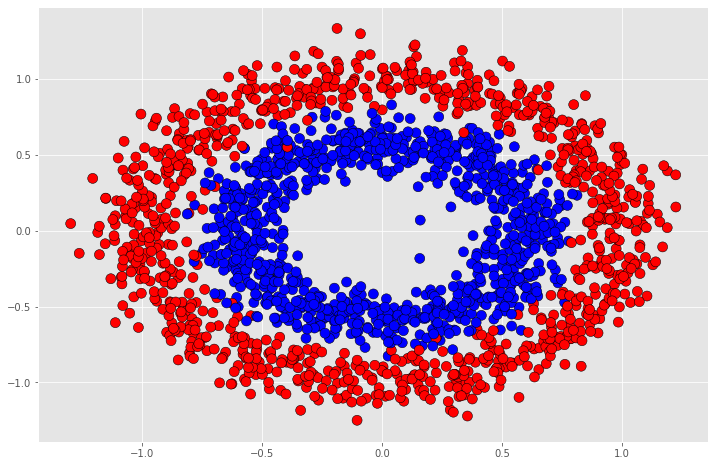

In [40]:
binary_colors = ['red', 'blue']
binary_cmap = matplotlib.colors.ListedColormap(binary_colors)


plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:,1], c=y, marker='o', edgecolor='k', s=100, cmap=binary_cmap)

Clearly there is no way a linear model can separate the two values ( red, blue ) - but we are going to try so we can see what happens.

Create a holdout dataset of 10% of the data and a test dataset that is 25% of the remaining 90% of the dataset.



In [41]:
X, X_holdout, y, y_holdout = train_test_split(X,y,test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

## Linear Model - Logistic Regression

Try a linear model on non-linear dataset.  Used to show that while LinearRegression and DeepLearning can solve the same linear problem, only DeepLearning an solve non-linear problems.

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logreg.coef_

array([[ 0.04117527, -0.07527537]])

In [44]:
logreg.intercept_

array([-0.00267699])

In [45]:
logreg.score(X_test, y_test)

0.4822222222222222

In [46]:
logreg.score(X_holdout, y_holdout)

0.45

In [47]:
logreg_preds = logreg.predict(X_holdout)

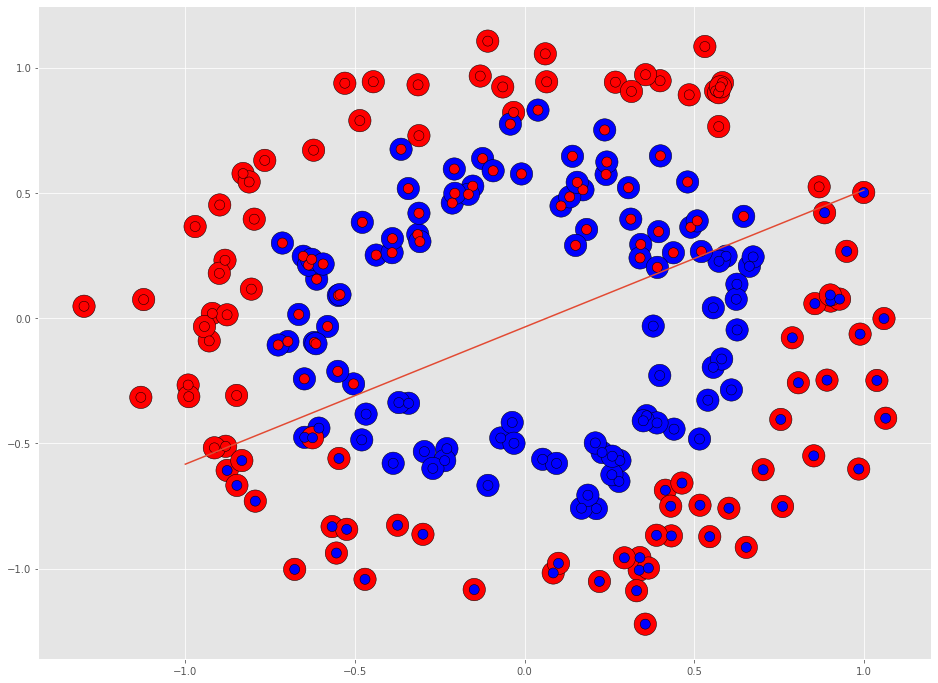

In [48]:
plt.figure(figsize=(16,12))

plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_holdout, marker='o', edgecolor='k', s=500, cmap=binary_cmap)
plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=logreg_preds, marker='o', edgecolor='k', s=100, cmap=binary_cmap)

line_bias = logreg.intercept_
line_w = logreg.coef_.T
points_x = np.linspace(-1,1,100)

points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)


In [49]:
logreg.score(X_holdout, y_holdout)

0.45

## Non-Linear Random Forest Decision Tree

Lets see how a non-linear Machine Learning Decision Tree would perform against this dataset.

In [50]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=100, max_depth=2)
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
random_clf.score(X_test, y_test)

0.8177777777777778

In [52]:
random_clf.score(X_holdout, y_holdout)

0.825

The RandomForestClassifier does much better with a 90+% accuracy. (Since we did not include any random state values the actual performance will be depend upon the train_test_split.)  We can see how this classifier will do on the holdout dataset.

In [53]:
y_random_pred = random_clf.predict(X_holdout)

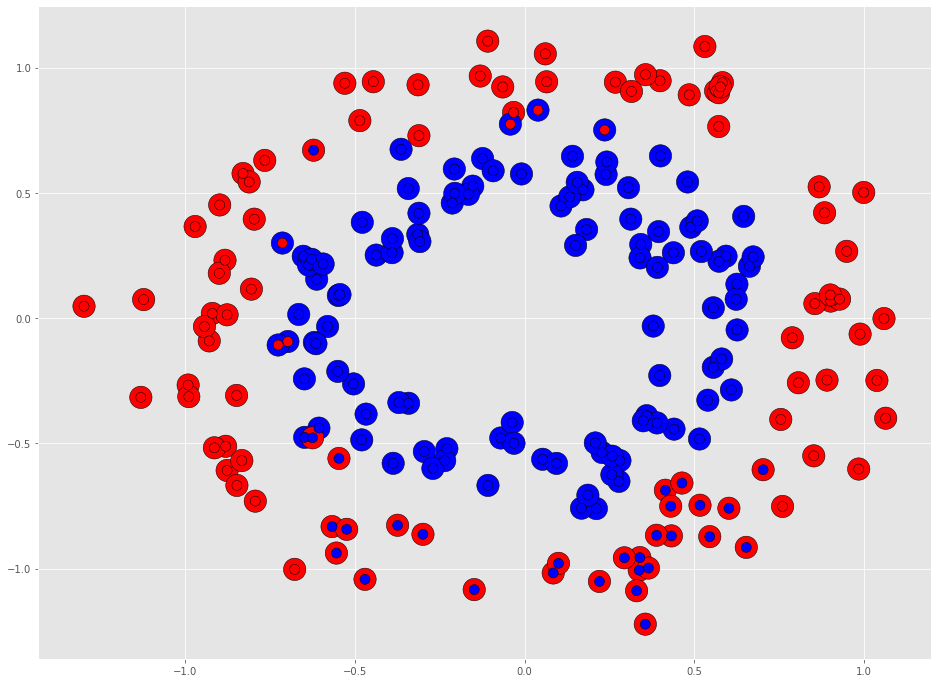

In [54]:
plt.figure(figsize=(16,12))

plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_holdout, marker='o', edgecolor='k', s=500, cmap=binary_cmap)
plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_random_pred, marker='o', edgecolor='k', s=100, cmap=binary_cmap)


## DeepLearning Model

Lets see if we can train a Deep Neural Network to seperate the circle datasets with better accuracy that the RandomForestClassifier.

This neural network will only have the input layer and 2 hidden 8-node layers followed by the output layer.

In [22]:
model = Sequential()
model.add(Dense(8, input_shape=(2,), activation="relu"))
model.add(Dense(8, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
sgd = SGD(0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [61]:
# https://gist.github.com/craffel/2d727968c3aaebd10359

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

[]

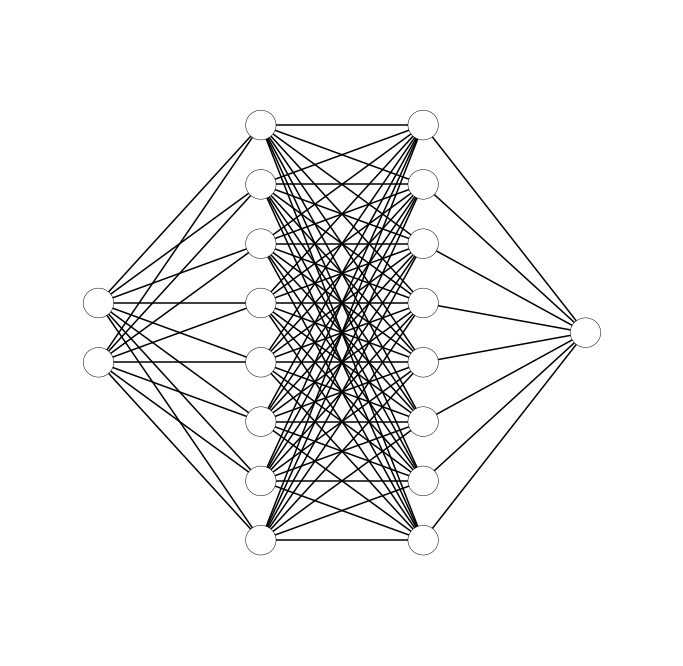

In [63]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 8, 8, 1])
ax.plot()

Train the model with 50 Epochs.  We will see that this is not enough

In [24]:
num_epochs = 50
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=64)


Train on 1350 samples, validate on 450 samples
Epoch 1/50
1350/1350 [==============================] - 1s 373us/sample - loss: 0.6807 - accuracy: 0.5067 - val_loss: 0.6823 - val_accuracy: 0.4778
Epoch 2/50
1350/1350 [==============================] - 0s 25us/sample - loss: 0.6801 - accuracy: 0.5089 - val_loss: 0.6816 - val_accuracy: 0.4778
Epoch 3/50
1350/1350 [==============================] - 0s 24us/sample - loss: 0.6793 - accuracy: 0.5119 - val_loss: 0.6807 - val_accuracy: 0.4844
Epoch 4/50
1350/1350 [==============================] - 0s 24us/sample - loss: 0.6786 - accuracy: 0.5089 - val_loss: 0.6799 - val_accuracy: 0.4911
Epoch 5/50
1350/1350 [==============================] - 0s 23us/sample - loss: 0.6779 - accuracy: 0.5104 - val_loss: 0.6791 - val_accuracy: 0.5022
Epoch 6/50
1350/1350 [==============================] - 0s 23us/sample - loss: 0.6772 - accuracy: 0.5193 - val_loss: 0.6784 - val_accuracy: 0.5022
Epoch 7/50
1350/1350 [==============================] - 0s 24us/sample

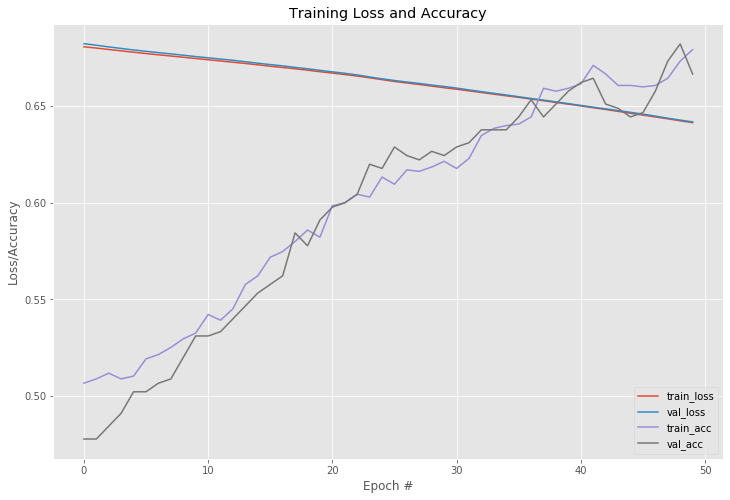

In [25]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [26]:
model_eval = model.evaluate(X_holdout, y_holdout, verbose=0)
list(zip(model.metrics_names, model_eval))

[('loss', 0.6217296767234802), ('accuracy', 0.715)]

Clearly 50 Epochs is not enough.  The Loss/Accuracy curves show that the model has not converged, and the accuracy is only 70%.

In [27]:
# holdout test
y_pred = model.predict(X_holdout)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

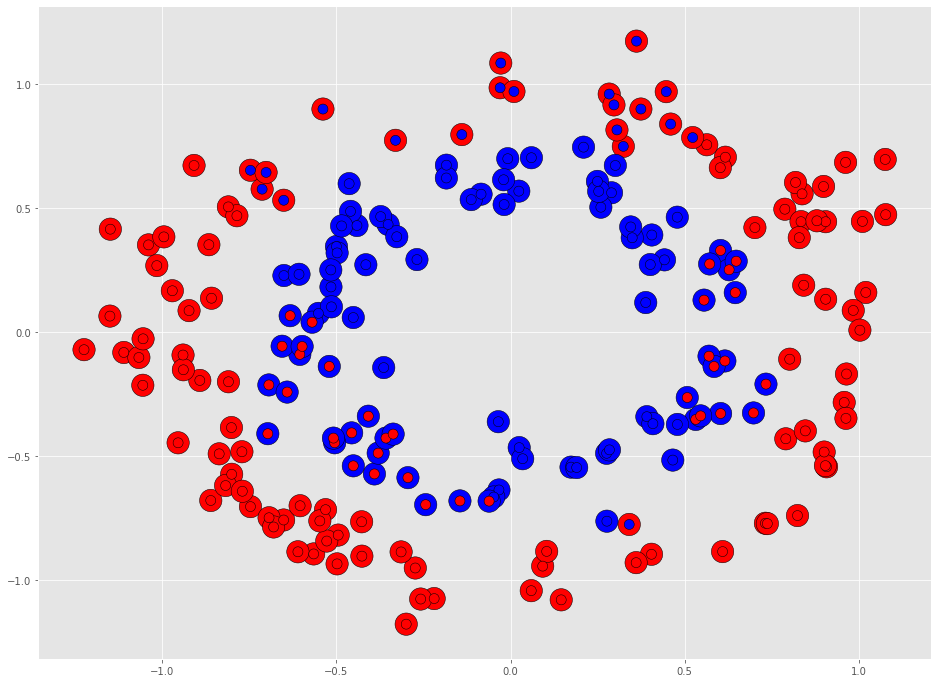

In [28]:
plt.figure(figsize=(16,12))

plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_holdout, marker='o', edgecolor='k', s=500, cmap=binary_cmap)
plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_pred, marker='o', edgecolor='k', s=100, cmap=binary_cmap)


Increase the number of Epochs to 600 and view the Loss/Accuracy.

In [29]:
num_epochs = 600
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=64)


Train on 1350 samples, validate on 450 samples
Epoch 1/600
1350/1350 [==============================] - 0s 26us/sample - loss: 0.6404 - accuracy: 0.6741 - val_loss: 0.6408 - val_accuracy: 0.6844
Epoch 2/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6394 - accuracy: 0.6844 - val_loss: 0.6398 - val_accuracy: 0.6800
Epoch 3/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6384 - accuracy: 0.6756 - val_loss: 0.6386 - val_accuracy: 0.6867
Epoch 4/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.6373 - accuracy: 0.6837 - val_loss: 0.6376 - val_accuracy: 0.6867
Epoch 5/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.6362 - accuracy: 0.6867 - val_loss: 0.6364 - val_accuracy: 0.6933
Epoch 6/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.6353 - accuracy: 0.6919 - val_loss: 0.6354 - val_accuracy: 0.6889
Epoch 7/600
1350/1350 [==============================] - 0s 22us/

Epoch 56/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.5559 - accuracy: 0.7778 - val_loss: 0.5593 - val_accuracy: 0.7800
Epoch 57/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.5534 - accuracy: 0.7778 - val_loss: 0.5571 - val_accuracy: 0.7867
Epoch 58/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.5510 - accuracy: 0.7800 - val_loss: 0.5549 - val_accuracy: 0.7844
Epoch 59/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.5484 - accuracy: 0.7830 - val_loss: 0.5527 - val_accuracy: 0.7889
Epoch 60/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.5459 - accuracy: 0.7919 - val_loss: 0.5501 - val_accuracy: 0.7978
Epoch 61/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.5431 - accuracy: 0.8007 - val_loss: 0.5476 - val_accuracy: 0.8000
Epoch 62/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.5405 - accuracy: 0.8111

Epoch 111/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.3575 - accuracy: 0.9615 - val_loss: 0.3706 - val_accuracy: 0.9467
Epoch 112/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3536 - accuracy: 0.9615 - val_loss: 0.3670 - val_accuracy: 0.9511
Epoch 113/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3498 - accuracy: 0.9615 - val_loss: 0.3631 - val_accuracy: 0.9511
Epoch 114/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3459 - accuracy: 0.9622 - val_loss: 0.3587 - val_accuracy: 0.9533
Epoch 115/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3419 - accuracy: 0.9615 - val_loss: 0.3551 - val_accuracy: 0.9511
Epoch 116/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3382 - accuracy: 0.9637 - val_loss: 0.3513 - val_accuracy: 0.9489
Epoch 117/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.3344 - accuracy:

1350/1350 [==============================] - 0s 23us/sample - loss: 0.1986 - accuracy: 0.9763 - val_loss: 0.2183 - val_accuracy: 0.9622
Epoch 166/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1967 - accuracy: 0.9770 - val_loss: 0.2162 - val_accuracy: 0.9622
Epoch 167/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1948 - accuracy: 0.9770 - val_loss: 0.2141 - val_accuracy: 0.9622
Epoch 168/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1928 - accuracy: 0.9763 - val_loss: 0.2127 - val_accuracy: 0.9622
Epoch 169/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1908 - accuracy: 0.9770 - val_loss: 0.2111 - val_accuracy: 0.9622
Epoch 170/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1890 - accuracy: 0.9778 - val_loss: 0.2092 - val_accuracy: 0.9622
Epoch 171/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1871 - accuracy: 0.9785 - val_

Epoch 220/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.1242 - accuracy: 0.9844 - val_loss: 0.1466 - val_accuracy: 0.9689
Epoch 221/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.1232 - accuracy: 0.9844 - val_loss: 0.1456 - val_accuracy: 0.9689
Epoch 222/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.1224 - accuracy: 0.9844 - val_loss: 0.1454 - val_accuracy: 0.9711
Epoch 223/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.1216 - accuracy: 0.9837 - val_loss: 0.1450 - val_accuracy: 0.9711
Epoch 224/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.1208 - accuracy: 0.9867 - val_loss: 0.1436 - val_accuracy: 0.9689
Epoch 225/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.1199 - accuracy: 0.9844 - val_loss: 0.1428 - val_accuracy: 0.9689
Epoch 226/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.1191 - accuracy:

1350/1350 [==============================] - 0s 23us/sample - loss: 0.0913 - accuracy: 0.9859 - val_loss: 0.1171 - val_accuracy: 0.9711
Epoch 275/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0910 - accuracy: 0.9867 - val_loss: 0.1159 - val_accuracy: 0.9711
Epoch 276/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0903 - accuracy: 0.9859 - val_loss: 0.1155 - val_accuracy: 0.9711
Epoch 277/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0900 - accuracy: 0.9859 - val_loss: 0.1150 - val_accuracy: 0.9711
Epoch 278/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0895 - accuracy: 0.9867 - val_loss: 0.1144 - val_accuracy: 0.9711
Epoch 279/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0892 - accuracy: 0.9844 - val_loss: 0.1142 - val_accuracy: 0.9711
Epoch 280/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0887 - accuracy: 0.9844 - val_

Epoch 329/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0741 - accuracy: 0.9844 - val_loss: 0.1009 - val_accuracy: 0.9733
Epoch 330/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0739 - accuracy: 0.9852 - val_loss: 0.1006 - val_accuracy: 0.9733
Epoch 331/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0737 - accuracy: 0.9852 - val_loss: 0.1005 - val_accuracy: 0.9733
Epoch 332/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0734 - accuracy: 0.9852 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 333/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0732 - accuracy: 0.9852 - val_loss: 0.1005 - val_accuracy: 0.9756
Epoch 334/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0731 - accuracy: 0.9844 - val_loss: 0.0999 - val_accuracy: 0.9733
Epoch 335/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0728 - accuracy:

1350/1350 [==============================] - 0s 23us/sample - loss: 0.0644 - accuracy: 0.9844 - val_loss: 0.0930 - val_accuracy: 0.9756
Epoch 384/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0643 - accuracy: 0.9859 - val_loss: 0.0927 - val_accuracy: 0.9756
Epoch 385/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0642 - accuracy: 0.9844 - val_loss: 0.0926 - val_accuracy: 0.9733
Epoch 386/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0640 - accuracy: 0.9837 - val_loss: 0.0925 - val_accuracy: 0.9733
Epoch 387/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0638 - accuracy: 0.9837 - val_loss: 0.0922 - val_accuracy: 0.9756
Epoch 388/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0637 - accuracy: 0.9859 - val_loss: 0.0919 - val_accuracy: 0.9711
Epoch 389/600
1350/1350 [==============================] - 0s 27us/sample - loss: 0.0640 - accuracy: 0.9830 - val_

Epoch 438/600
1350/1350 [==============================] - 0s 29us/sample - loss: 0.0580 - accuracy: 0.9844 - val_loss: 0.0881 - val_accuracy: 0.9756
Epoch 439/600
1350/1350 [==============================] - 0s 29us/sample - loss: 0.0579 - accuracy: 0.9844 - val_loss: 0.0882 - val_accuracy: 0.9733
Epoch 440/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.0577 - accuracy: 0.9844 - val_loss: 0.0882 - val_accuracy: 0.9756
Epoch 441/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0577 - accuracy: 0.9844 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 442/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0576 - accuracy: 0.9852 - val_loss: 0.0879 - val_accuracy: 0.9733
Epoch 443/600
1350/1350 [==============================] - 0s 23us/sample - loss: 0.0574 - accuracy: 0.9852 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 444/600
1350/1350 [==============================] - 0s 22us/sample - loss: 0.0575 - accuracy:

1350/1350 [==============================] - 0s 25us/sample - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.0858 - val_accuracy: 0.9733
Epoch 493/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.0536 - accuracy: 0.9852 - val_loss: 0.0859 - val_accuracy: 0.9733
Epoch 494/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0535 - accuracy: 0.9852 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 495/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0534 - accuracy: 0.9852 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 496/600
1350/1350 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 1.00 - 0s 24us/sample - loss: 0.0533 - accuracy: 0.9852 - val_loss: 0.0856 - val_accuracy: 0.9733
Epoch 497/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0532 - accuracy: 0.9859 - val_loss: 0.0855 - val_accuracy: 0.9733
Epoch 498/600
1350/1350 [==============================] - 0s 24us/sampl

1350/1350 [==============================] - 0s 24us/sample - loss: 0.0504 - accuracy: 0.9852 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 547/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0510 - accuracy: 0.9867 - val_loss: 0.0841 - val_accuracy: 0.9733
Epoch 548/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0506 - accuracy: 0.9859 - val_loss: 0.0839 - val_accuracy: 0.9733
Epoch 549/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.0503 - accuracy: 0.9859 - val_loss: 0.0839 - val_accuracy: 0.9733
Epoch 550/600
1350/1350 [==============================] - 0s 25us/sample - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0840 - val_accuracy: 0.9733
Epoch 551/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0839 - val_accuracy: 0.9733
Epoch 552/600
1350/1350 [==============================] - 0s 24us/sample - loss: 0.0501 - accuracy: 0.9852 - val_

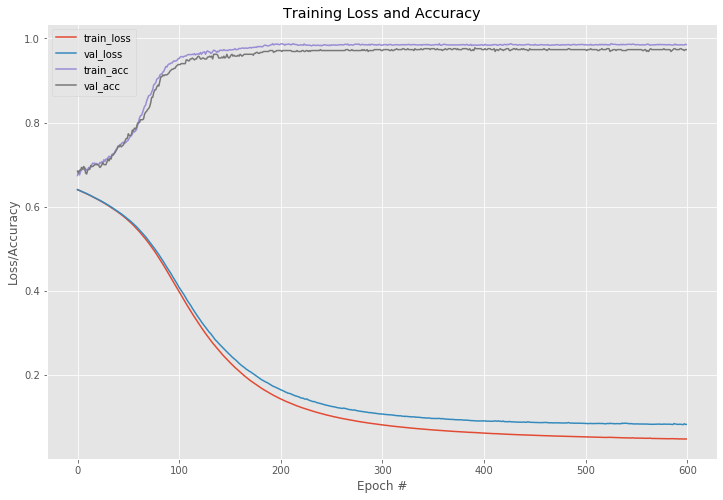

In [30]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [31]:
model_eval = model.evaluate(X_holdout, y_holdout, verbose=0)
list(zip(model.metrics_names, model_eval))

[('loss', 0.051138629019260404), ('accuracy', 0.995)]

With more training Epochs, we can see that the accuracy is greatly improved and the Loss/Accuracy curve is very good showing no signs of overfitting.

In [32]:
# holdout test
y_pred = model.predict(X_holdout)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

Plot the predictions with the longer trained model and see how the predictions did.

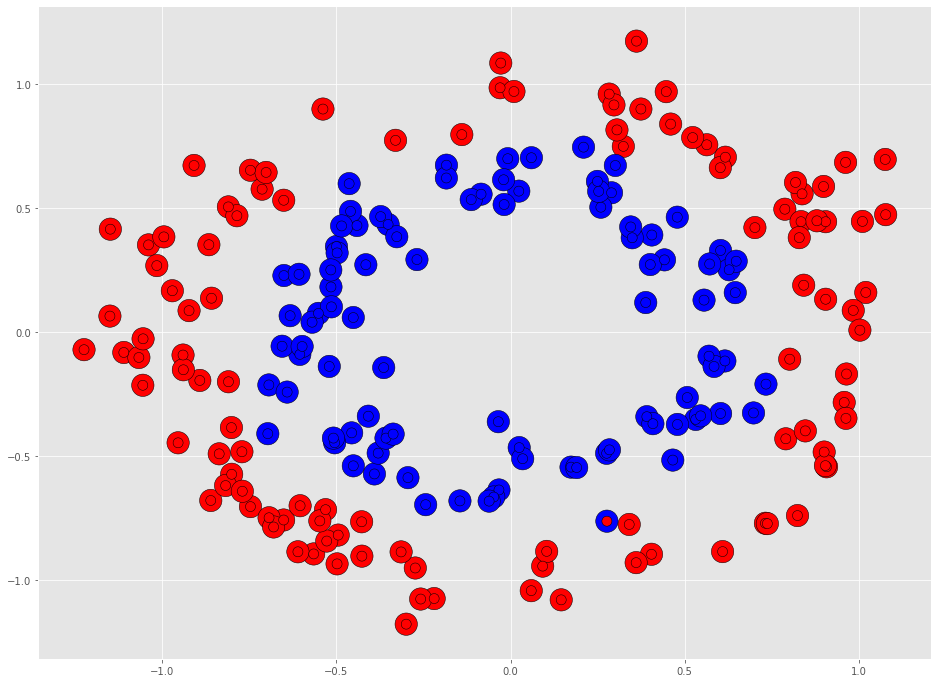

In [33]:
plt.figure(figsize=(16,12))

plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_holdout, marker='o', edgecolor='k', s=500, cmap=binary_cmap)
plt.scatter(X_holdout[:, 0], X_holdout[:,1], c=y_pred, marker='o', edgecolor='k', s=100, cmap=binary_cmap)


## Summary

In this notebook we looked a non-linear dataset ( concentric circles ) to see how different approaches performed.

LogisticRegression only had an accuracy of 50%.  Which makes sense because there is no way to split the data with a line.

RandomForestClassifier performed much better with an accuracy in the high 80s to low 90 percent.  This can likely be improved if we tuned the hyperparameters however it was an impressive improvement with little extra work.  However, if you run the notebook a few times you will see that the performance is dependent upon the split of the train/test/holdout datasets.  (We really should perform a cross_val_score or a GridSearchCV ).  

The simple 2 hidden layer Neural Network, with enough Epochs consistently performed very well in the 98%+ range.  

For non-linear problems you have to look to use non-linear classifiers. 